# **Zero-Loss Peak Subtraction with Neural Networks**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/LHCfitNikhef/CBL-ML/blob/tutorial/Tutorial/EELS_tutorial.ipynb)

## Loading the data

First of all, let us install and import all the required modules

In [1]:
!pip install ncempy

In [2]:
from ncempy.io import dm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import imageClass as EELSImage
#from trainZLP import train_nn_scaled

In this tutorial, we will study.....

The spectral image can be imported with the lines below

In [3]:
path_to_dm4 = 'area03-eels-SI-aligned.dm4'
im = EELSImage.Spectral_image.load_data(path_to_dm4)

## Plotting the data

Integrated intensity 2D plot + show selection

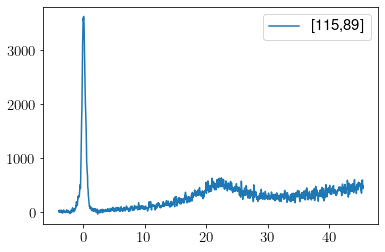

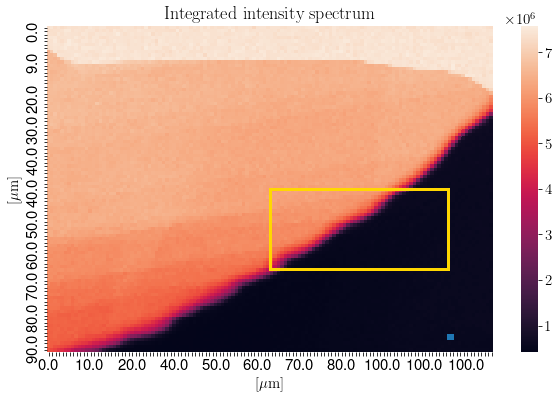

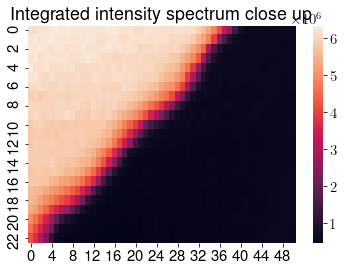

In [4]:
full_width, full_height = im.image_shape[1], im.image_shape[0]
loc_x, loc_y = int(0.9 * full_width), int(0.95 * full_height)
im.plot_spectrum(loc_y, loc_x)

xmin, width = 0.5, 0.4
ymin, height = 0.5, 0.25
window = np.array([[xmin, width], [ymin, height]])
data_zoomed = im.show_image(selection = window, pixel_highlight = [loc_x, loc_y])

In [5]:
data_zoomed;

## Monte Carlo replica method

Train on the replicas within a preselected cluster. One feature only: intensity. Not the integrated intensity.

## Constructing the Neural Network

Rescaling to range 0.1-0.9

In [10]:
n_rep = im.data.shape[0] * im.data.shape[1]
n_epochs = 100
path_to_models = 'models/'
display_step = 100
added_dE1 = 0.7

im.train_ZLPs(data_zoomed, n_rep = n_rep,
              n_epochs = n_epochs, 
              path_to_models = path_to_models, 
              display_step = display_step,  
              added_dE1 = added_dE1)

AttributeError: 'Spectral_image' object has no attribute 'n_clusters'

## Training the ZLP

Pretrained models

## ZLP subtraction

## Bandgap fit